In [ ]:
!pip install pillow
!pip install gdown
!pip install matplotlib

#### Learning resources:
1. https://note.nkmk.me/en/python-pillow-putalpha/
2. https://pythontic.com/image-processing/pillow/alpha-composite

In [ ]:
!gdown https://drive.google.com/drive/folders/1Ih5bsIxBvTS0Pbb7e_GflMeFe0fmeeg5 -O /content/sample_images --folder

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
# Function to change the image size
def changeImageSize(maxWidth, 
                    maxHeight, 
                    image):
    
    widthRatio  = maxWidth/image.size[0]
    heightRatio = maxHeight/image.size[1]
    newWidth    = int(widthRatio*image.size[0])
    newHeight   = int(heightRatio*image.size[1])
    newImage    = image.resize((newWidth, newHeight))
    return newImage

In [4]:
img_1 = '/content/sample_images/img_1.jpg'  #@param {type:"string"}
img_2 = '/content/sample_images/img_2.jpg' #@param {type:"string"}

# Take two images    
image1 = Image.open(img_1)
image2 = Image.open(img_2)

In [5]:

weight = 800 #@param{type: "number"}
height = 500 #@param{type: "number"}

# Make the sizes of images uniform
image3 = changeImageSize(weight, height, image1)
image4 = changeImageSize(weight, height, image2)

In [11]:
alpha_img_3 = 75 #@param{type: "slider", min:0, max:100, step:1}
alpha_img_4 = 86 #@param{type: "slider", min:0, max:100, step:1}

alpha_img_3 = int((128/50) * alpha_img_3)
alpha_img_4 = int((128/50) * alpha_img_4)

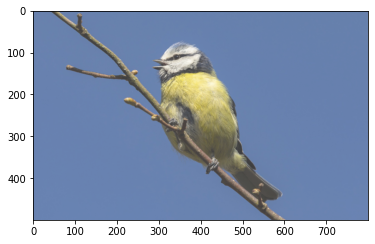

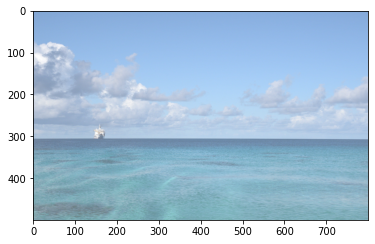

In [12]:
# alpha_img_3 = 1 #@param{type: "number"}
# alpha_img_4 = 1 #@param{type: "number"}

#######################
# 1% = 2.56           #
# (128/255)*100 = 50% #
#######################

# Make sure the images have alpha channels
image3.putalpha(alpha_img_3)
image4.putalpha(alpha_img_4)

plt.imshow(image3)
plt.show()
plt.imshow(image4)
plt.show()
# img = image3.convert('RGBA')

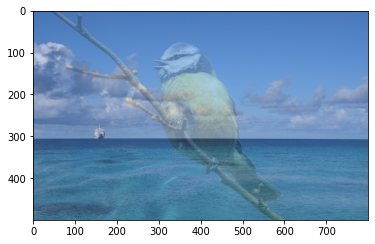

In [16]:
# Do an alpha composite of image4 over image3
alphaComposited = Image.alpha_composite(image3, image4)

# Display the alpha composited image
plt.imshow(alphaComposited)
print("")

In [ ]:
# Save image 
alphaComposited.save("alpha_composited.png")

from google.colab import files
files.download('alpha_composited.png')

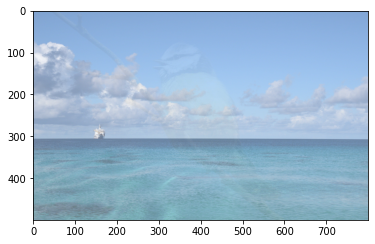

In [14]:

alpha = .1 #@param{type: "number"}

alphaBlended = Image.blend(image4, image3, alpha)

# Display the alpha blended composited image
plt.imshow(alphaBlended)
print("")

In [ ]:

# Save image 
alphaBlended.save("alpha_blended.png")

from google.colab import files
files.download('alpha_blended.png')